In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
# Set max columns and rows displayed
pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 10000)

In [3]:
# Read in files
training = pd.read_csv("./train.csv")
testing = pd.read_csv("./test.csv")

In [4]:
training.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
training.shape

(2051, 81)

In [6]:
training.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [7]:
training['MS SubClass'].value_counts()

20     770
60     394
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
180     11
45      11
40       4
150      1
Name: MS SubClass, dtype: int64

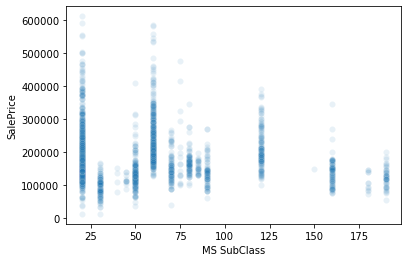

In [8]:
# Some correlation but with age-related categories there may be some major collinearity here
sns.scatterplot(x=training['MS SubClass'], y=training['SalePrice'], alpha=0.1);

In [9]:
training['MS Zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

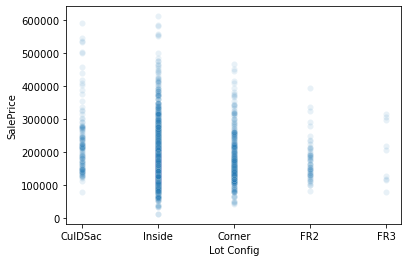

In [10]:
# I don't think this will be very useful
sns.scatterplot(x=training['Lot Config'], y=training['SalePrice'], alpha=0.1);

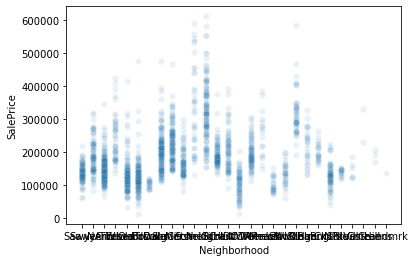

In [11]:
# Definite differences between neighborhoods, worth making dummies for
sns.scatterplot(x=training['Neighborhood'], y=training['SalePrice'], alpha=0.1);

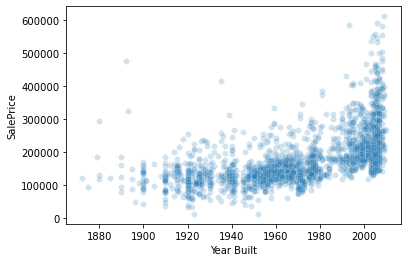

In [12]:
# Strong correlation but it isn't very linear - this one may require feature engineering
# Also that statistical heaping in early decades is suspicious but probably not too damaging
sns.scatterplot(x=training['Year Built'], y=training['SalePrice'], alpha=0.2);

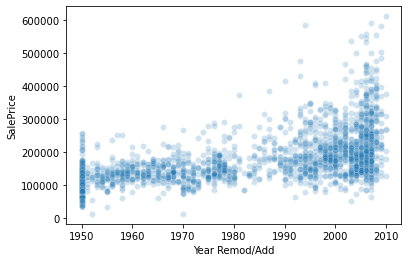

In [13]:
# Similar to above but I don't like the look of that floor at 1950, will drop that year if I use this feature
# It almost certainly actually represents '1950 OR BEFORE'
sns.scatterplot(x=training['Year Remod/Add'], y=training['SalePrice'], alpha=0.2);

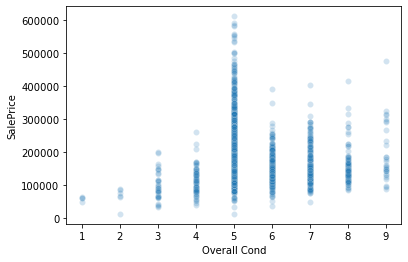

In [14]:
# 5 seems really heavily overreported, maybe to the point where this feature would distort results?
sns.scatterplot(x=training['Overall Cond'], y=training['SalePrice'], alpha=0.2);

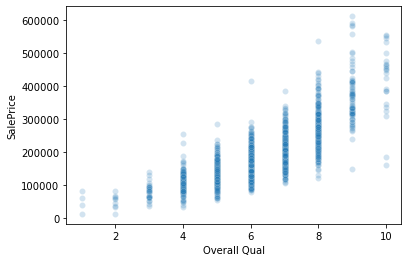

In [15]:
# Oooh, that's excellent
sns.scatterplot(x=training['Overall Qual'], y=training['SalePrice'], alpha=0.2);

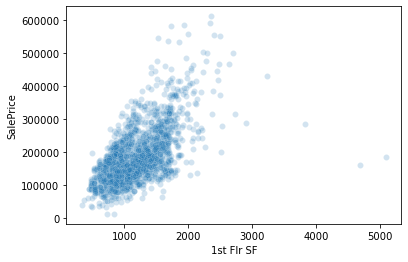

In [16]:
# Nice strong linear relationship with square footage, but with a few definite outliers that may need to be pruned
sns.scatterplot(x=training['1st Flr SF'], y=training['SalePrice'], alpha=0.2);

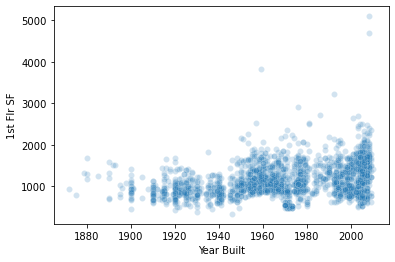

In [17]:
# Surprised that it looks like new houses aren't much bigger overall, there's a trend upwards but not as strong as I expected
sns.scatterplot(x=training['Year Built'], y=training['1st Flr SF'], alpha=0.2);

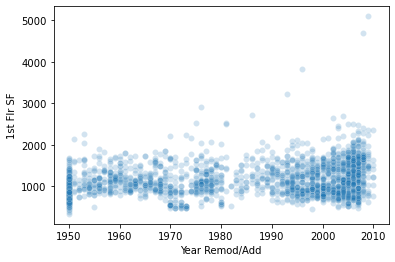

In [18]:
# Even less trend here. That floor definitely has to go.
sns.scatterplot(x=training['Year Remod/Add'], y=training['1st Flr SF'], alpha=0.2);

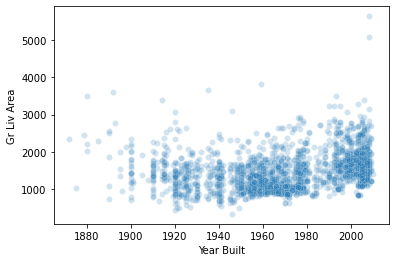

In [19]:
# Still just a weak trend - may be survivorship bias. Those outliers are really throwing things off, though. 
sns.scatterplot(x=training['Year Built'], y=training['Gr Liv Area'], alpha=0.2);

In [20]:
# Getting rid of the outliers
training.drop(training[training['Gr Liv Area'] > 4000].index, inplace=True)

In [21]:
# Getting rid of that floor
training.drop(training[training['Year Remod/Add'] == 1950].index, inplace=True)

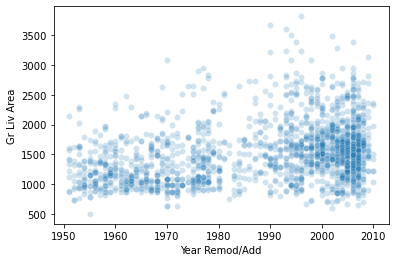

In [22]:
# MUCH better
sns.scatterplot(x=training['Year Remod/Add'], y=training['Gr Liv Area'], alpha=0.2);

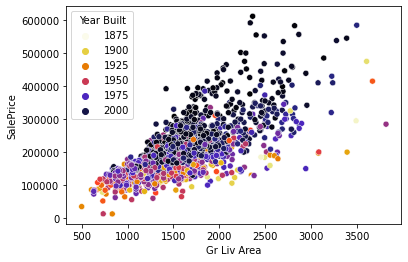

In [23]:
# Fascinating - strong, fairly linear correlation but it seems like more recent builds have a steeper correlation than older ones
sns.scatterplot(x=training['Gr Liv Area'], y=training['SalePrice'], hue=training['Year Built'], palette='CMRmap_r');

In [24]:
# This is not diverse enough to be useful
training['Heating'].value_counts()

GasA    1773
GasW      12
OthW       1
Wall       1
Name: Heating, dtype: int64

In [25]:
# Same for this one
training['Central Air'].value_counts()

Y    1732
N      55
Name: Central Air, dtype: int64

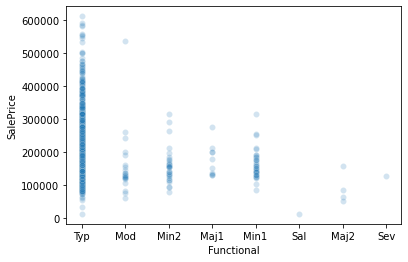

In [26]:
# This could be useful?
sns.scatterplot(x=training['Functional'], y=training['SalePrice'], alpha=0.2);

In [27]:
# I actually think it isn't diverse enough or strong enough, I won't use it
training['Functional'].value_counts()

Typ     1683
Min1      35
Min2      31
Mod       22
Maj1      10
Maj2       4
Sev        1
Sal        1
Name: Functional, dtype: int64

In [28]:
# Defining just the features I want to work with
subset = [
    'Id', 
    'Lot Area', 
    'Neighborhood', 
    'Overall Qual', 
    'Overall Cond', 
    'Year Built', 
    'Year Remod/Add', 
    'Bsmt Unf SF', 
    'Total Bsmt SF', 
    'Gr Liv Area', 
    'Bedroom AbvGr', 
    'Garage Type',
]

In [29]:
# Smaller dataframe with just my features
train_trimmed = training[subset].copy()

In [30]:
# Gotta add sale price back onto the training set
train_trimmed['SalePrice'] = training['SalePrice']

In [31]:
# trimming test too
test_trimmed = testing[subset].copy()

In [32]:
train_trimmed.head()

,Id,Lot Area,Neighborhood,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Bsmt Unf SF,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Garage Type,SalePrice
0,109,13517,Sawyer,6,8,1976,2005,192.0,725.0,1479,3,Attchd,130500
1,544,11492,SawyerW,7,5,1996,1997,276.0,913.0,2122,4,Attchd,220000
2,153,7922,NAmes,5,7,1953,2007,326.0,1057.0,1057,3,Detchd,109000
3,318,9802,Timber,5,5,2006,2007,384.0,384.0,1444,3,BuiltIn,174000
4,255,14235,SawyerW,6,8,1900,1993,676.0,676.0,1445,3,Detchd,138500


In [33]:
train_trimmed.dtypes

Id                  int64
Lot Area            int64
Neighborhood       object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Gr Liv Area         int64
Bedroom AbvGr       int64
Garage Type        object
SalePrice           int64
dtype: object

In [34]:
train_trimmed.shape

(1787, 13)

In [35]:
# Nothing untoward here - some very skewed distributions but that's to be expected
train_trimmed.describe()

,Id,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Bsmt Unf SF,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,SalePrice
count,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000
mean,1451.174594,10214.016228,6.278120,5.574706,1977.765529,1989.175713,568.909905,1097.803581,1525.075546,2.856184,191207.261891
std,835.436675,6796.376719,1.371763,1.055773,26.906444,17.632951,459.219890,425.475718,486.302602,0.817652,79044.017930
min,1.000000,1300.000000,1.000000,1.000000,1872.000000,1951.000000,0.000000,0.000000,498.000000,0.000000,12789.000000
25%,740.500000,7788.000000,5.000000,5.000000,1961.000000,1974.500000,216.000000,835.500000,1152.000000,2.000000,137700.000000
50%,1466.000000,9600.000000,6.000000,5.000000,1978.000000,1996.000000,452.000000,1050.000000,1478.000000,3.000000,172500.000000
75%,2156.000000,11772.000000,7.000000,6.000000,2003.000000,2004.000000,813.500000,1369.000000,1763.000000,3.000000,223000.000000
max,2930.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,2336.000000,3206.000000,3820.000000,8.000000,611657.000000


In [36]:
train_trimmed['Bedroom AbvGr'].value_counts()

3    1004
2     448
4     221
1      62
5      34
6      12
0       5
8       1
Name: Bedroom AbvGr, dtype: int64

In [37]:
# Engineering a feature for finished basement square footage
train_trimmed['Bsmt Fin SF'] = train_trimmed['Total Bsmt SF'] - train_trimmed['Bsmt Unf SF']

In [38]:
# repeating in test
test_trimmed['Bsmt Fin SF'] = test_trimmed['Total Bsmt SF'] - test_trimmed['Bsmt Unf SF']

In [39]:
train_trimmed.head()

,Id,Lot Area,Neighborhood,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Bsmt Unf SF,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Garage Type,SalePrice,Bsmt Fin SF
0,109,13517,Sawyer,6,8,1976,2005,192.0,725.0,1479,3,Attchd,130500,533.0
1,544,11492,SawyerW,7,5,1996,1997,276.0,913.0,2122,4,Attchd,220000,637.0
2,153,7922,NAmes,5,7,1953,2007,326.0,1057.0,1057,3,Detchd,109000,731.0
3,318,9802,Timber,5,5,2006,2007,384.0,384.0,1444,3,BuiltIn,174000,0.0
4,255,14235,SawyerW,6,8,1900,1993,676.0,676.0,1445,3,Detchd,138500,0.0


In [40]:
# 5 is so dominant and spans such a diverse range of prices that I think I won't use Cond
train_trimmed['Overall Cond'].value_counts()

5    1096
6     299
7     214
8      90
4      37
9      29
3      18
2       3
1       1
Name: Overall Cond, dtype: int64

In [41]:
# Dropping Cond from both frames
train_trimmed.drop(columns='Overall Cond', inplace=True)
test_trimmed.drop(columns='Overall Cond', inplace=True)

In [42]:
# Getting dummies for my categoricals
train_dummy = pd.get_dummies(data=train_trimmed, columns=['Neighborhood', 'Garage Type'], drop_first=True)
test_dummy = pd.get_dummies(data=test_trimmed, columns=['Neighborhood', 'Garage Type'], drop_first=True)

In [43]:
train_dummy.head()

,Id,Lot Area,Overall Qual,Year Built,Year Remod/Add,Bsmt Unf SF,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,SalePrice,Bsmt Fin SF,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd
0,109,13517,6,1976,2005,192.0,725.0,1479,3,130500,533.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,544,11492,7,1996,1997,276.0,913.0,2122,4,220000,637.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,153,7922,5,1953,2007,326.0,1057.0,1057,3,109000,731.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,318,9802,5,2006,2007,384.0,384.0,1444,3,174000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,255,14235,6,1900,1993,676.0,676.0,1445,3,138500,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [44]:
# Let's see if there are any discrepancies between train and test besides sale price
set(train_dummy.columns.tolist()) - set(test_dummy.columns.tolist())

{'Neighborhood_GrnHill', 'Neighborhood_Landmrk', 'SalePrice'}

In [45]:
# Add those neighborhood dummy columns to test for the sake of consistency
test_dummy['Neighborhood_GrnHill'] = 0
test_dummy['Neighborhood_Landmrk'] = 0

In [46]:
# Nothing in test that isn't in train, thankfully
set(test_dummy.columns.tolist()) - set(train_dummy.columns.tolist())

set()

In [47]:
# Setting up features and target for a quick initial regression
X = train_dummy.drop(columns=['Id', 'Total Bsmt SF', 'SalePrice'])
X2 = test_dummy.drop(columns=['Id', 'Total Bsmt SF'])
y = train_dummy['SalePrice']

In [48]:
# Instantiate a linear regression object
lr = LinearRegression()

In [49]:
# This looks surprisingly good?
cross_val_score(lr, X, y).mean()

0.8636185111101995

In [50]:
# Quick fit
lr.fit(X,y)

LinearRegression()

In [52]:
# Get predictions and add them to the frame as a new column
train_dummy['preds'] = lr.predict(X)

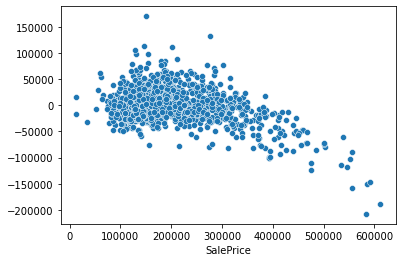

In [53]:
# Scatter residuals against target - I'm overestimating at lower prices and drastically underestimating at high prices
# Basically we have a curve here where there ought to be a line. Poly features may help. 
sns.scatterplot(x=y, y=(train_dummy['preds']-y));

In [54]:
# Okay, time to get serious

In [55]:
features = train_dummy.drop(columns=['Id', 'Total Bsmt SF', 'SalePrice', 'preds']).columns.tolist()

In [56]:
# Instantiate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

In [57]:
# Poly transforming train and test sets
X_poly = poly.fit_transform(X)
X2_poly = poly.fit_transform(X2)

In [58]:
# Turn these poly versions back into dataframes
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names(features))
X2_poly_df = pd.DataFrame(X2_poly, columns=poly.get_feature_names(features))

In [59]:
# The interactions between neighborhoods are pointless but shouldn't have any effect, so I think it would be more work to get rid of them
X_poly_df.head()

,Lot Area,Overall Qual,Year Built,Year Remod/Add,Bsmt Unf SF,Gr Liv Area,Bedroom AbvGr,Bsmt Fin SF,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Lot Area^2,Lot Area Overall Qual,Lot Area Year Built,Lot Area Year Remod/Add,Lot Area Bsmt Unf SF,Lot Area Gr Liv Area,Lot Area Bedroom AbvGr,Lot Area Bsmt Fin SF,Lot Area Neighborhood_Blueste,Lot Area Neighborhood_BrDale,Lot Area Neighborhood_BrkSide,Lot Area Neighborhood_ClearCr,Lot Area Neighborhood_CollgCr,Lot Area Neighborhood_Crawfor,Lot Area Neighborhood_Edwards,Lot Area Neighborhood_Gilbert,Lot Area Neighborhood_Greens,Lot Area Neighborhood_GrnHill,Lot Area Neighborhood_IDOTRR,Lot Area Neighborhood_Landmrk,Lot Area Neighborhood_MeadowV,Lot Area Neighborhood_Mitchel,Lot Area Neighborhood_NAmes,Lot Area Neighborhood_NPkVill,Lot Area Neighborhood_NWAmes,Lot Area Neighborhood_NoRidge,Lot Area Neighborhood_NridgHt,Lot Area Neighborhood_OldTown,Lot Area Neighborhood_SWISU,Lot Area Neighborhood_Sawyer,Lot Area Neighborhood_SawyerW,Lot Area Neighborhood_Somerst,Lot Area Neighborhood_StoneBr,Lot Area Neighborhood_Timber,Lot Area Neighborhood_Veenker,Lot Area Garage Type_Attchd,Lot Area Garage Type_Basment,Lot Area Garage Type_BuiltIn,Lot Area Garage Type_CarPort,Lot Area Garage Type_Detchd,Overall Qual^2,Overall Qual Year Built,Overall Qual Year Remod/Add,Overall Qual Bsmt Unf SF,Overall Qual Gr Liv Area,Overall Qual Bedroom AbvGr,Overall Qual Bsmt Fin SF,Overall Qual Neighborhood_Blueste,Overall Qual Neighborhood_BrDale,Overall Qual Neighborhood_BrkSide,Overall Qual Neighborhood_ClearCr,Overall Qual Neighborhood_CollgCr,Overall Qual Neighborhood_Crawfor,Overall Qual Neighborhood_Edwards,Overall Qual Neighborhood_Gilbert,Overall Qual Neighborhood_Greens,Overall Qual Neighborhood_GrnHill,Overall Qual Neighborhood_IDOTRR,Overall Qual Neighborhood_Landmrk,Overall Qual Neighborhood_MeadowV,Overall Qual Neighborhood_Mitchel,Overall Qual Neighborhood_NAmes,Overall Qual Neighborhood_NPkVill,Overall Qual Neighborhood_NWAmes,Overall Qual Neighborhood_NoRidge,Overall Qual Neighborhood_NridgHt,Overall Qual Neighborhood_OldTown,Overall Qual Neighborhood_SWISU,Overall Qual Neighborhood_Sawyer,Overall Qual Neighborhood_SawyerW,Overall Qual Neighborhood_Somerst,Overall Qual Neighborhood_StoneBr,Overall Qual Neighborhood_Timber,Overall Qual Neighborhood_Veenker,Overall Qual Garage Type_Attchd,Overall Qual Garage Type_Basment,Overall Qual Garage Type_BuiltIn,Overall Qual Garage Type_CarPort,Overall Qual Garage Type_Detchd,Year Built^2,Year Built Year Remod/Add,Year Built Bsmt Unf SF,Year Built Gr Liv Area,Year Built Bedroom AbvGr,Year Built Bsmt Fin SF,Year Built Neighborhood_Blueste,Year Built Neighborhood_BrDale,Year Built Neighborhood_BrkSide,Year Built Neighborhood_ClearCr,Year Built Neighborhood_CollgCr,Year Built Neighborhood_Crawfor,Year Built Neighborhood_Edwards,Year Built Neighborhood_Gilbert,Year Built Neighborhood_Greens,Year Built Neighborhood_GrnHill,Year Built Neighborhood_IDOTRR,Year Built Neighborhood_Landmrk,Year Built Neighborhood_MeadowV,Year Built Neighborhood_Mitchel,Year Built Neighborhood_NAmes,Year Built Neighborhood_NPkVill,Year Built Neighborhood_NWAmes,Year Built Neighborhood_NoRidge,Year Built Neighborhood_NridgHt,Year Built Neighborhood_OldTown,Year Built Neighborhood_SWISU,Year Built Neighborhood_Sawyer,Year Built Neighborhood_SawyerW,Year Built Neighborhood_Somerst,Year Bui

In [60]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X_poly_df,
    y,
    test_size=0.2,
    random_state=42
)

In [61]:
# Instantiate and apply standard scaler
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)
Z_test_2 = sc.transform(X2_poly_df)

In [62]:
# Instantiating and fitting a new linear regression on scaled poly data
lr2 = LinearRegression()
lr2.fit(Z_train, y_train)

LinearRegression()

In [86]:
# Hahahaha oh god what the hell is that test score
print(f"Training data score: {lr2.score(Z_train, y_train)}")
print(f"Testing data score: {lr2.score(Z_test, y_test)}")

Training data score: 0.953357537037349
Testing data score: -1.4061336463602904e+22


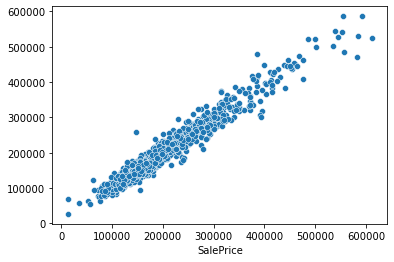

In [68]:
# This looks great
sns.scatterplot(x=y_train, y=lr2.predict(Z_train));

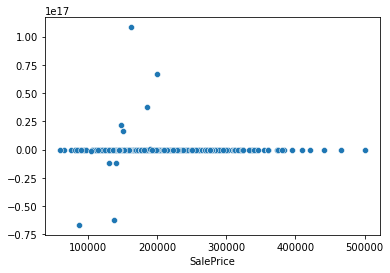

In [71]:
# So I think we can say this is a liiiiiiiiittle overfit
sns.scatterplot(x=y_test, y=lr2.predict(Z_test));

In [82]:
lr2.predict(Z_test).tolist()

[351941.6843021797,
 284659.6843021797,
 191909.68430217975,
 229068.68430217975,
 222909.68430217975,
 484909.6843021797,
 153629.18430217975,
 145162.68430217975,
 221369.68430217975,
 146924.68430217975,
 204045.68430217975,
 72377.68430217975,
 143225.18430217975,
 217297.68430217975,
 118585.68430217975,
 170148.68430217975,
 452173.6843021797,
 137563.68430217975,
 125729.68430217975,
 160689.18430217975,
 244968.68430217975,
 219429.68430217975,
 194609.68430217975,
 138463.68430217975,
 209770.68430217975,
 148741.68430217975,
 6.67716952887381e+16,
 122095.68430217975,
 309609.6843021797,
 199387.18430217975,
 140791.68430217975,
 212977.68430217975,
 150484.68430217975,
 166209.68430217975,
 333949.6843021797,
 204992.18430217975,
 235448.18430217975,
 111579.68430217975,
 94477.68430217975,
 158250.68430217975,
 184185.68430217975,
 65013.684302179754,
 147467.68430217975,
 187537.68430217975,
 279703.6843021797,
 142129.68430217975,
 117933.18430217975,
 128856.68430217975,

In [83]:
y_test

622     337500
1324    285000
1553    214000
331     178000
2023    192000
1227    500000
791     179000
680     154000
1708    216837
1888    148500
1963    154000
1982     81000
282     149900
1430    205000
1031    125000
1954    167800
1117    466500
1277    135000
1548    170000
1181    172500
1555    240900
1696    224000
1354    200000
1273    146000
289     206300
817     146500
127     199500
267     115400
979     259000
1298    210400
1348    140000
1480    202500
1932    173000
1032    154000
1569    335000
1061    185000
1960    210900
787      98000
643     114000
611     155000
1579    136900
677      94900
238     145000
2021    195800
1807    279000
575     144000
273     129000
491     137500
786     373000
378     244000
755     127500
721     185000
500     173000
30      278000
402     128200
1218    179000
1091    167000
895     169985
70      308030
1637    153575
1788     90500
1653    136500
78      154300
1914    196000
477     122500
839     282000
608     23

In [87]:
lr2.coef_

array([-1.79048455e+05, -3.30208960e+05,  8.31687760e+05, -7.57966019e+05,
       -4.41407065e+05, -1.71991340e+05,  2.00047283e+05, -2.88763866e+05,
        7.23865938e+14, -4.29339657e+14, -7.14100314e+14, -5.98922522e+14,
       -1.72155636e+15,  5.27495072e+15, -1.32506319e+15, -7.50061571e+14,
       -2.12040633e+14,  6.50279761e+14, -7.34487910e+14, -9.58654469e+14,
       -1.09104714e+15, -1.09526458e+15, -1.27135887e+15,  4.86749903e+15,
       -1.47450075e+15,  1.56457170e+15, -3.61720413e+15, -9.37431038e+14,
        6.65178228e+14, -9.02890350e+14, -1.26945990e+15, -2.04310580e+15,
        8.37483541e+14, -3.27761211e+15,  5.84486835e+14, -2.34714862e+15,
       -1.41173872e+15, -1.77965524e+15, -1.58110826e+14, -1.46557803e+15,
       -1.93404375e+04,  2.11615659e+04, -2.48494844e+04,  2.34891773e+05,
        1.01339590e+04,  1.89474297e+04, -2.03809219e+04, -1.40072266e+02,
       -1.15073027e+15,  5.27476562e+02, -4.11628906e+03, -5.00203125e+03,
       -1.43681719e+04, -